In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file = open('housing_midterm_trn.csv', 'rb')
data = np.genfromtxt(file, delimiter=',',skip_header=1)

print(data, data.shape)

(array([[ -8.35856840e+01,   4.16891950e+01,   1.92200000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   2.60000000e+04],
       [ -8.35902220e+01,   4.16744070e+01,   1.93300000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   7.00000000e+04],
       [ -8.37115990e+01,   4.16334100e+01,   1.99700000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   2.49000000e+04],
       ..., 
       [ -8.37260110e+01,   4.16056160e+01,   1.99600000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.89900000e+05],
       [ -8.37055010e+01,   4.16623350e+01,   1.97900000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.68000000e+05],
       [ -8.35781620e+01,   4.16265910e+01,   1.92500000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   3.70000000e+04]]), (20357, 22))


# Data description
The data contains 20357 records of single family homes sold in Lucas County, Ohio, in 1993-1998. 
There are coordinates, date of sale (derived dummy variable for the year of sale), as well as multiple variables providing essential information about each house. 

###Inputs:

0. longitude
1. latitude
2. yrbuilt, year built
3. stories code,  1=one,2=bilevel,3=multilevel,4=one+half,5=two,6=two+half,7=three
4. TLA, total living area in square feet
5. Wall code,  1=Stucco or Dryvit plaster, 2=Concrete block or tile, 3=Aluminum, vinyl, or steel siding, 4=brick, 5=stone, 6=wood, 7=partial brick
6. \#beds
7. \#baths
8. \#halfbaths
9. frontage
10. garage type code
11. garage sqft
12. \#rooms,  \# of rooms \\
13. lotsize, lot size in square feet
14. sale date yymmdd, date of sale in yymmdd format, e.g., Oct 17, 1997 = 971017
15. sold93, a year of sale dummy, 1=1993
16. sold94, etc.
17. sold95
18. sold96
19. sold97
20. sold98

###Output:

price, selling price ($)


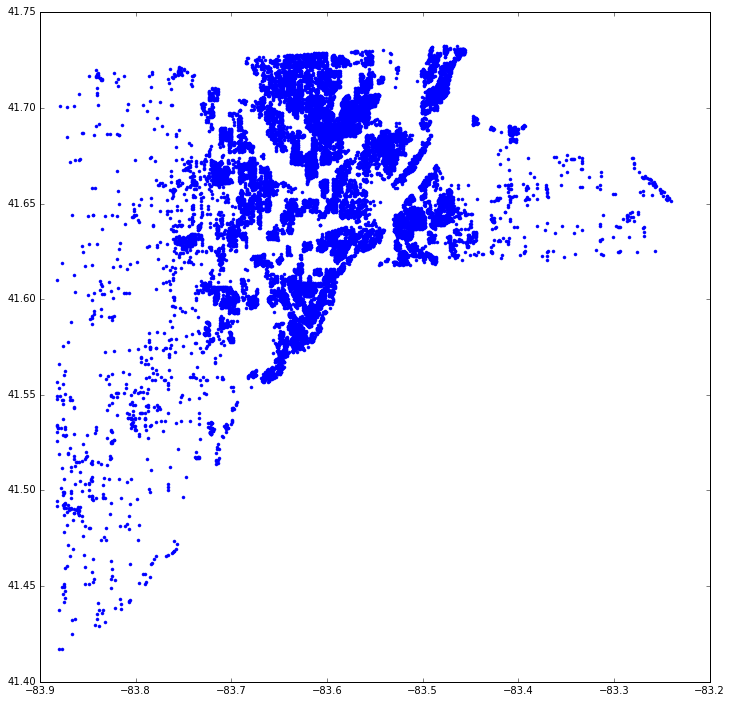

In [4]:
plt.figure(figsize=(12,12))
plt.plot(data[:,0],data[:,1],'.')

In [5]:
f = open('houses_midterm.kml', 'w')

#Writing the kml file.
f.write("<?xml version='1.0' encoding='UTF-8'?>\n")
f.write("<kml xmlns='http://earth.google.com/kml/2.1'>\n")
f.write("<Document>\n")
f.write("   <name>" + 'houses_midterm.kml' +"</name>\n")
for row in data[:1000]:
    f.write("   <Placemark>\n")
    f.write("       <name>" + str(int(row[-1])) + "</name>\n")
    f.write("       <description>" + 'Year built:   ' + str(int(row[2])) + '\nTLA:  ' + str(int(row[4])) + '\n\n$/sq.ft.:   ' + str(int(float(row[-1])/float(row[4])) )+ "</description>\n")
    f.write("       <Point>\n")
    f.write("           <coordinates>" + str(row[0]) + "," + str(row[1]) + "," + str() + "</coordinates>\n")
    f.write("       </Point>\n")
    f.write("   </Placemark>\n")
f.write("</Document>\n")
f.write("</kml>\n")
f.close()

#### Are newly built houses more expensive?

(0, 400000)

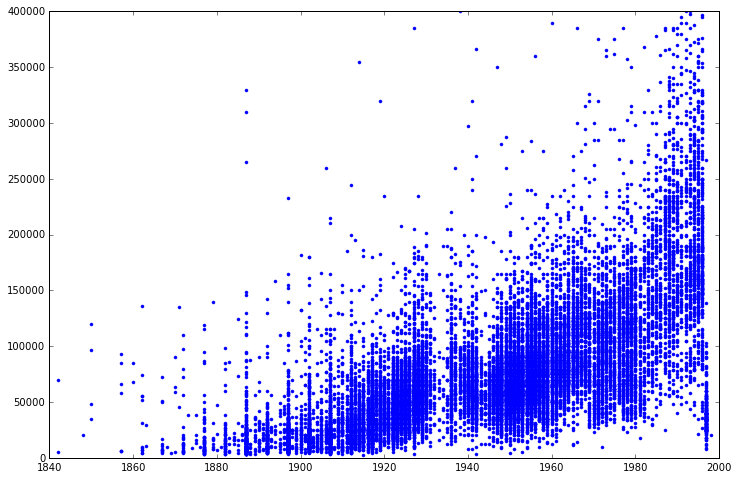

In [7]:
plt.figure(figsize=(12,8))
plt.plot(data[:,2], data[:,-1],'.')

plt.xlim([1840, 2000])
plt.ylim([0, 400000])

#### TLA (total living area) is obviously a good predictor of the price too.

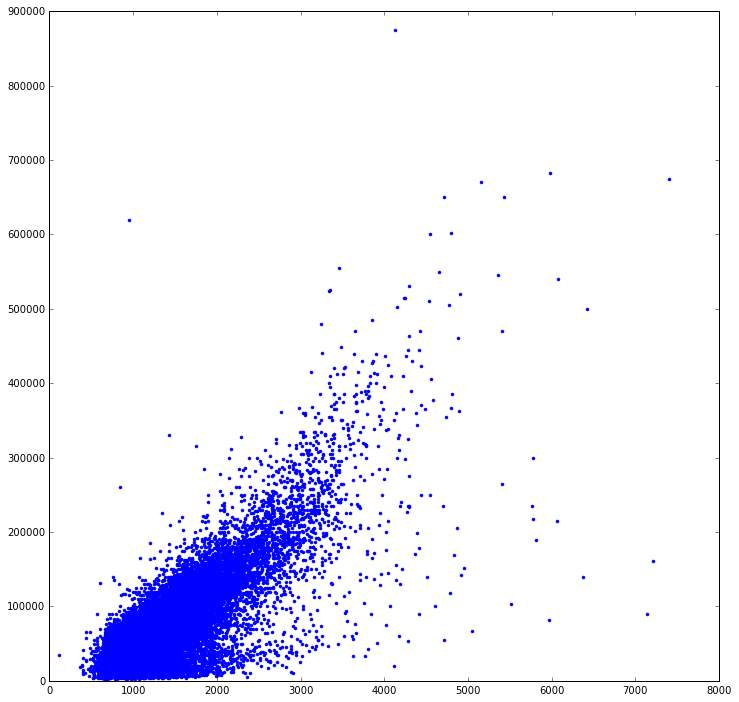

In [8]:
plt.figure(figsize=(12,12))
plt.plot(data[:,4], data[:,-1],'.')

Let's map the $/sq.ft. We will cut off the very high values for now to see the general tendencies.

### The price per sq.ft varies spatially!

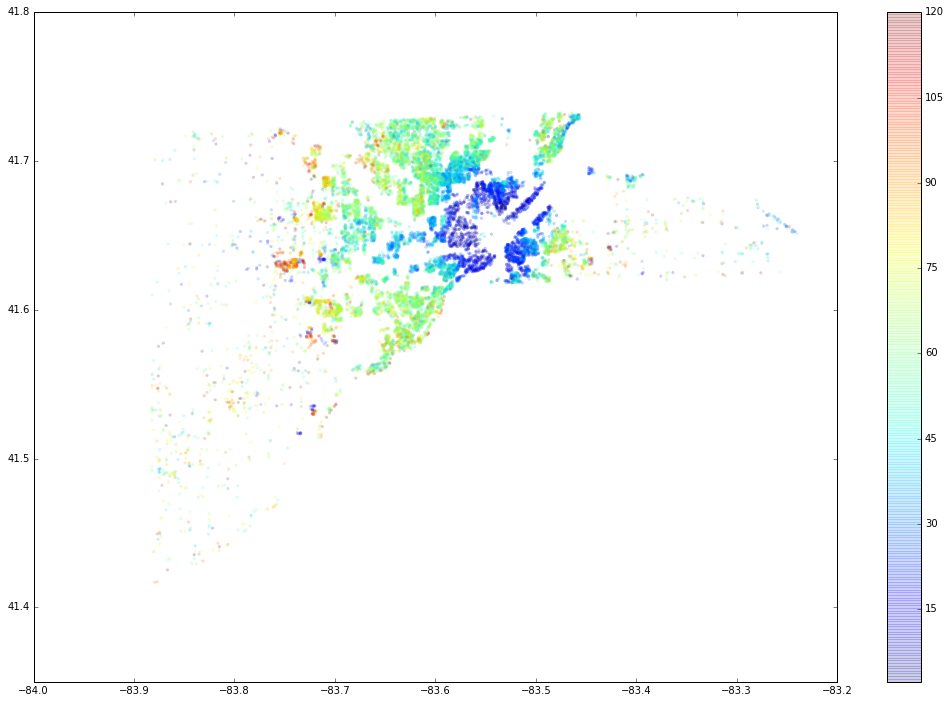

In [9]:
plt.figure(figsize=(18,12))

pptla = data[:,-1]/data[:,4]
pptla[pptla>120] = 120

plt.scatter(data[:,0], data[:,1], s=10, c=pptla, alpha = 0.2, edgecolors='none')

plt.colorbar()

#### Let's map the $ per lot size too.

Again, we will cut off the very high values for now to see the general tendencies.

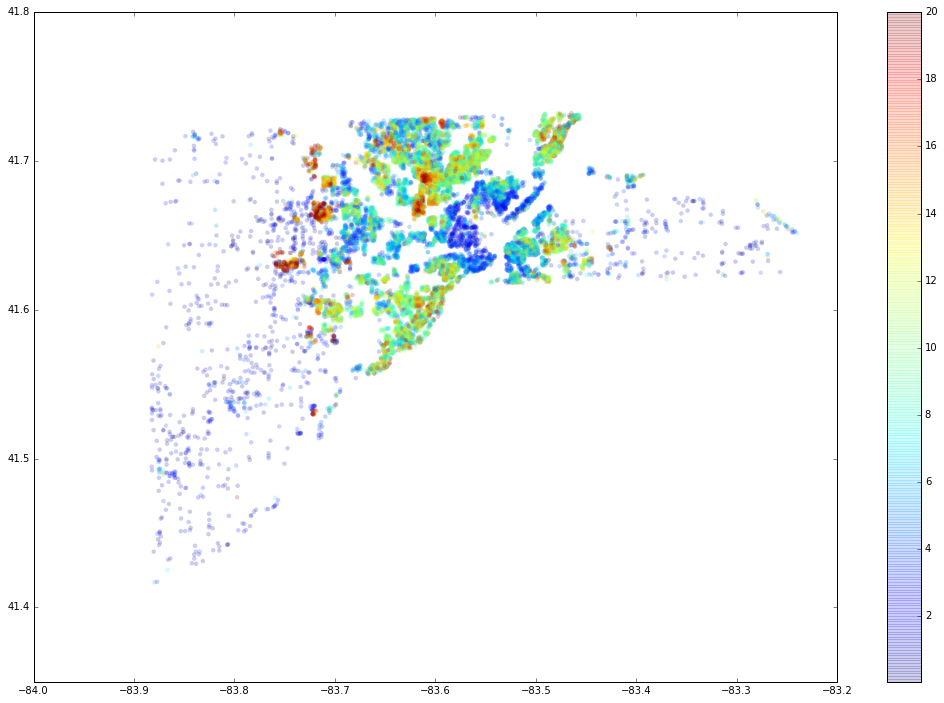

In [10]:
plt.figure(figsize=(18,12))

pplot = data[:,-1]/data[:,13]
pplot[pplot>20] = 20

plt.scatter(data[:,0], data[:,1], s=20, c=pplot, alpha = 0.2, edgecolors='none')

plt.colorbar()